# Análise de Reclamações do Procon

## Objetivo

Este relatório tem como objetivo realizar uma análise sobre as reclamações de empresas no procon utilizando como base todos os anos disponíveis em: https://www.kaggle.com/gerosa/procon/data.

A análise a ser feita,deve responder quais são as empresas que mais possuem reclamações no procon.

## Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import heapq

Para a análise dos arquivos em csv serão utilizadas as bibliotecas pandas para a anáise dos arquivos, numpy para as análises estatísticas e o matplotlib para criação dos gráficos com os dados levantados.

Primeiramente serão analisados cada arquivo separadamente para saber quais são as empresas com mais reclamações por cada ano.

## Primeiro Dataset

O primeiro dataset é uma análise das reclamações no procon do ano de 2012.
Iremos verificar quais são as 5 empresas que possuem mais reclamações e as 5 empresas que possuem menos reclamações. Para isso iremos carregar e ler o arquivo de reclamações do procon de 2012 através da biblioteca Pandas.

In [3]:
dataset_one = pd.read_csv('./dados/reclamacoes-fundamentadas-sindec-2012.csv', low_memory=False)
dataset_one

,﻿AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2012,2012-07-13 17:44:45.000,2009-09-17 10:48:42.000,3,Sudeste,ES,IBI PROMOTORA DE VENDAS LTDA.,IBI CARD,1,7.448120e+13,...,7490104,ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE ...,N,54,Cartão de Crédito,32,Calculo de prestação em atraso,F,mais de 70 anos,29072040
1,2012,2012-07-13 17:37:19.000,2009-09-17 10:02:24.000,3,Sudeste,ES,SAMSUNG ELETRONICA DA AMAZONIA LTDA,SAMSUNG,1,2.802730e+11,...,2640000,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...",N,101,"Telefone ( Convencional, Celular, Interfone, E...",102,"Garantia (Abrangência, cobertura, etc.)",M,entre 31 a 40 anos,29115360
2,2012,2012-07-16 09:07:13.000,2009-09-17 11:36:47.000,3,Sudeste,ES,LINNU''S AUTOMOVEIS LTDA.,LINNUS AUTOMOVEIS,1,3.635548e+13,...,4512902,COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTORES,N,129,Carro Nacional Zero ( Montadora ),111,Venda enganosa,M,entre 21 a 30 anos,29060110
3,2012,2012-12-10 09:05:09.000,2009-09-21 09:01:49.000,5,Centro-oeste,GO,AMAZON PC INDUSTRIA E COMERCIO DE MICROCOMPUTA...,AMAZON PC,1,1.614079e+12,...,2621300,FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA,S,102,Microcomputador / Produtos de Informática,102,"Garantia (Abrangência, cobertura, etc.)",M,entre 21 a 30 anos,75911000
4,2012,2012-07-13 17:51:01.000,2009-09-18 17:32:22.000,3,Sudeste,ES,OFFICINA REVESTIMENTOS LTDA ME,NaN,1,5.444155e+12,...,4744005,COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...,N,118,Material de Acabamento de Construção Pronto (P...,116,"Contrato/pedido/orçamento (rescisão, descumpri...",M,Nao Informada,29090120
5,2012,2012-07-17 15:25:26.000,2009-09-22 09:49:56.000,3,Sudeste,ES,AON AFFINITY DO BRASIL SERVIÇOS E CORRETORA DE...,AON AFFINITY DO BRASIL,1,2.143320e+12,...,6629100,"ATIVIDADES AUXILIARES DOS SEGUROS, DA PREVIDÊN...",N,79,Seguro,54,Não pagamento de indenização (seguros em geral),M,entre 41 a 50 anos,29045060
6,2012,2012-04-04 08:10:10.000,2009-10-26 14:44:09.000,5,Centro-oeste,GO,ATLETHIC VEST ARTIGOS ESPORTIVOS LTDA ME,NaN,1,1.344500e+12,...,4763602,COMÉRCIO VAREJISTA DE ARTIGOS ESPORTIVOS,S,108,"Artigo Esportivo / Lazer ( Bola, Raquete, Rede...",107,Não entrega/demora na entrega do produto,M,entre 31 a 40 anos,75906385
7,2012,2012-07-17 14:47:52.000,2009-10-23 15:58:49.000,3,Sudeste,ES,BOMPRECO BAHIA SUPERMERCADOS LTDA,BOM PRECO,1,9.742262e+13,...,4711301,"COMÉRCIO VAREJISTA DE MERCADORIAS EM GERAL, CO...",N,102,Microcomputador / Produtos de Informática,102,"Garantia (Abrangência, cobertura, etc.)",F,entre 41 a 50 anos,29055280
8,2012,2012-09-28 15:56:42.000,2009-10-14 09:40:05.000,2,Nordeste,CE,TIM CELULAR S.A.,NaN,1,4.206050e+12,...,6120501,TELEFONIA MÓVEL CELULAR,N,187,Telefonia Celular,124,Serviço não fornecido (entrega/instalação/não ...,F,entre 41 a 50 anos,60125100
9,2012,2012-12-05 13:50:18.000,2009-05-15 12:33:24.000,5,Centro-oeste,DF,REAL LEASING S.A. ARRENDAMENTO MERCANTIL,SUDAMERIS,1,4.719315e+13,...,6440900,ARRENDAMENTO MERCANTIL,N,63,Financeira,28,Cobrança indevida.,F,entre 51 a 60 anos,70238110


Iremos acessar a coluna de strRazaoSocial para termos os nomes das empresas. Podemos então ter uma lista dos nomes das empresas que estão presentes no arquivo de 2012.

In [6]:
dataset_one_name = dataset_one['strRazaoSocial']
dataset_one_name

0                             IBI PROMOTORA DE VENDAS LTDA.
1                       SAMSUNG ELETRONICA DA AMAZONIA LTDA
2                                 LINNU''S AUTOMOVEIS LTDA.
3         AMAZON PC INDUSTRIA E COMERCIO DE MICROCOMPUTA...
4                            OFFICINA REVESTIMENTOS LTDA ME
5         AON AFFINITY DO BRASIL SERVIÇOS E CORRETORA DE...
6                  ATLETHIC VEST ARTIGOS ESPORTIVOS LTDA ME
7                         BOMPRECO BAHIA SUPERMERCADOS LTDA
8                                          TIM CELULAR S.A.
9                  REAL LEASING S.A. ARRENDAMENTO MERCANTIL
10                        TRÊS COMÉRCIO DE PUBLICAÇÕES LTDA
11                                                BANCO BMG
12                      SAMSUNG ELETRONICA DA AMAZONIA LTDA
13                            LG ELECTRONICS DO BRASIL LTDA
14                                          TIM CELULAR S/A
15           JUTAI 661 EQUIPAMENTOS ELETRONICOS LTDA (BENQ)
16        S J COMERCIO E ASSISTENCIA EM 

Para verificar quantas vezes cada empresa recebeu uma reclamação, iremos criar um dicionário para que as keys(chaves) deste dicionário sejam as empresas e suas values(valores) sejam o número de suas ocorrências em reclamações.

Então será percorrida a lista de nomes das empresas, e se a empresa não constar no dicionário, ela será adicionada e contará com uma ocorrência, se a empresa já estiver no dicionário, seu número de ocorrência anterior será adicionado a mais um, e será realizado esse processo até finalizar a lista de empresas do arquivo do procon de 2012.

In [8]:
occurrences = {}

# Percorrendo a lista e adicionando no dicionário as empresas e o número de vezes que estão contidas no arquivo.
for item in dataset_one_name:
    if item not in occurrences:
        occurrences[item] = 1
    elif item in occurrences:
        occurrences[item] = occurrences[item] + 1

Com as empresas e seu número de reclamações já estabelecidos, iremos verificar quais são as 5 com mais e com menos reclamações.

Para isso serão criados dicionários para os com maiores reclamações (max_values_one) e com menos reclamações (min_values_one)

In [10]:
max_values_one = {}
min_values_one = {}

print('**** As 5 empresas com mais reclamações ****')

for line in heapq.nlargest(5, occurrences, occurrences.get):
    max_values_one[line] = occurrences[line]
for item in max_values_one:
    print(item, ' - ', max_values_one[item])

print('\n**** As 5 empresas com menos reclamações ****')

for line in heapq.nsmallest(5, occurrences, occurrences.get):
    min_values_one[line] = occurrences[line]
for item in min_values_one:
    print(item, ' - ', min_values_one[item])

**** As 5 empresas com mais reclamações ****
SAMSUNG ELETRONICA DA AMAZONIA LTDA  -  2447
VIA VAREJO S.A  -  2504
RICARDO ELETRO DIVINOPOLIS LTDA  -  2545
TNL PCS S/A  -  2304
TELEMAR NORTE LESTE S/A  -  2031

**** As 5 empresas com menos reclamações ****
INGLESCURSO ESCOLA DE IDIOMA LTDA  -  1
PAULO CESAR ROCHA SOARES  -  1
CENTRO UNIVERSITARIO ANHAGUERA DE SÃO PAULO  -  1
ACADEMIA GAVIOES PAULISTA LTDA  -  1
ESTOFAMENTOS E CAPOTARIAS  -  1


### Gráfico - Empresas 2012

Com os dados das empresas e suas ocorrências guardadas em dicionários, estas serão acessadas e serão gerados gráficos para acompanhamento.

Abaixo será representado as 5 empresas que mais receberam reclamação no ano de 2012.

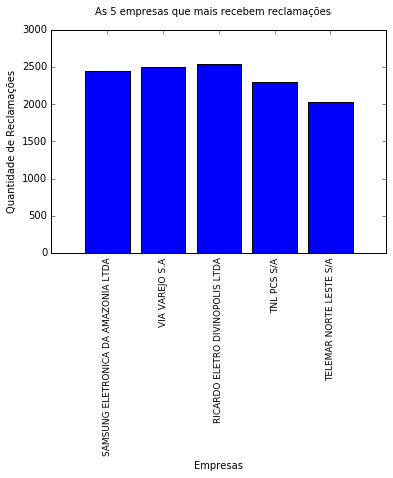

In [12]:
# Acessa as keys e values do dicionário para gerar uma lista pra criação do gráfico com as empresas com mais reclamações.
names = list(max_values_one.keys())
values = list(max_values_one.values())

plt.bar(range(len(max_values_one)), values, tick_label=names, align='center')
plt.xticks(fontsize=9, rotation='vertical')
plt.suptitle('As 5 empresas que mais recebem reclamações')
plt.xlabel('Empresas')
plt.ylabel('Quantidade de Reclamações')
plt.show()

Abaixo será representado as empresas com menos reclamações em 2012.

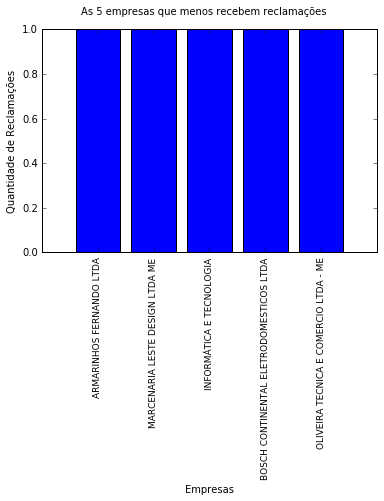

In [5]:
# Acessa as keys e values do dicionário para gerar uma lista pra criação do gráfico com as empresas com menos reclamações.
names = list(min_values_one.keys())
values = list(min_values_one.values())

plt.bar(range(len(min_values_one)), values, tick_label=names, align='center')
plt.xticks(fontsize=9, rotation='vertical')
plt.suptitle('As 5 empresas que menos recebem reclamações')
plt.xlabel('Empresas')
plt.ylabel('Quantidade de Reclamações')
plt.show()

## Segundo Dataset

O segundo dataset é uma análise das reclamações no procon do ano de 2013. Será realizado o mesmo processo para a captura das informações das empresas, antes declaradas aqui.

In [7]:
dataset_two = pd.read_csv('./dados/reclamacoes-fundamentadas-sindec-2013.csv', low_memory=False)
dataset_two_name = dataset_two['strRazaoSocial']

occurrences = {}
max_values_two = {}
min_values_two = {}

for item in dataset_two_name:
    if item not in occurrences:
        occurrences[item] = 1
    elif item in occurrences:
        occurrences[item] = occurrences[item] + 1

print('**** As 5 empresas com mais reclamações ****')

for line in heapq.nlargest(5, occurrences, occurrences.get):
    max_values_two[line] = occurrences[line]
for item in max_values_two:
    print(item, ' - ', max_values_two[item])

print('\n**** As 5 empresas com menos reclamações ****')

for line in heapq.nsmallest(5, occurrences, occurrences.get):
    min_values_two[line] = occurrences[line]
for item in min_values_two:
    print(item, ' - ', min_values_two[item])

**** As 5 empresas com mais reclamações ****
SAMSUNG ELETRONICA DA AMAZONIA LTDA  -  3381
NOKIA DO BRASIL TECNOLOGIA LTDA  -  2283
MOTOROLA INDUSTRIAL LTDA  -  2368
TELEMAR NORTE LESTE S/A  -  3789
TNL PCS S/A  -  3930

**** As 5 empresas com menos reclamações ****
BENSERVI - ASSOCIACAO DE BENEFICIOS AO SERVIDOR PU  -  1
GE IMAGINATION AT WORK  -  1
APROVEITEX  -  1
CIA DE COMERCIO EXTERIOR  -  1
OLIVEIRA TECNICA E COMERCIO LTDA - ME  -  1


### Gráfico - Empresas 2013

Abaixo será representado as empresas com mais reclamações em 2013.

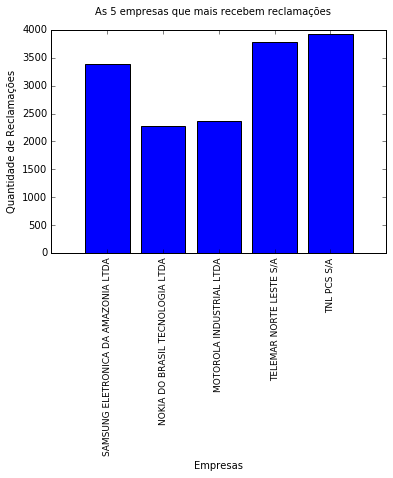

In [8]:
# Acessa as keys e values do dicionário para gerar uma lista pra criação do gráfico com as empresas com mais reclamações.
names = list(max_values_two.keys())
values = list(max_values_two.values())

plt.bar(range(len(max_values_two)), values, tick_label=names, align='center')
plt.xticks(fontsize=9, rotation='vertical')
plt.suptitle('As 5 empresas que mais recebem reclamações')
plt.xlabel('Empresas')
plt.ylabel('Quantidade de Reclamações')
plt.show()

Abaixo será representado as empresas com menos reclamações em 2013.

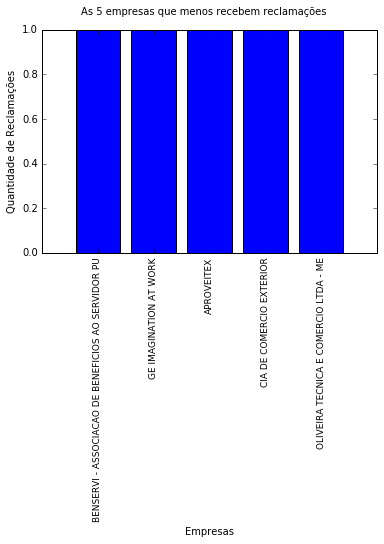

In [9]:
# Acessa as keys e values do dicionário para gerar uma lista pra criação do gráfico com as empresas com menos reclamações.
names = list(min_values_two.keys())
values = list(min_values_two.values())

plt.bar(range(len(min_values_two)), values, tick_label=names, align='center')
plt.xticks(fontsize=9, rotation='vertical')
plt.suptitle('As 5 empresas que menos recebem reclamações')
plt.xlabel('Empresas')
plt.ylabel('Quantidade de Reclamações')
plt.show()

## Terceiro Dataset

O terceiro dataset é uma análise das reclamações no procon do ano de 2014.

In [10]:
dataset_three = pd.read_csv('./dados/reclamacoes-fundamentadas-sindec-2014.csv', low_memory=False)
dataset_three_name = dataset_three['strRazaoSocial']

occurrences = {}
max_values_three = {}
min_values_three = {}

for item in dataset_three_name:
    if item not in occurrences:
        occurrences[item] = 1
    elif item in occurrences:
        occurrences[item] = occurrences[item] + 1

print('**** As 5 empresas com mais reclamações ****')

for line in heapq.nlargest(5, occurrences, occurrences.get):
    max_values_three[line] = occurrences[line]
for item in max_values_three:
    print(item, ' - ', max_values_three[item])

print('\n**** As 5 empresas com menos reclamações ****')

for line in heapq.nsmallest(5, occurrences, occurrences.get):
    min_values_three[line] = occurrences[line]
for item in min_values_three:
    print(item, ' - ', min_values_three[item])

**** As 5 empresas com mais reclamações ****
SAMSUNG ELETRONICA DA AMAZONIA LTDA  -  4101
TELEMAR NORTE LESTE S/A  -  5106
TELEFONICA BRASIL S/A  -  2181
DIGIBRAS INDUSTRIA DO BRASIL S/A  -  2381
TNL PCS S/A  -  2259

**** As 5 empresas com menos reclamações ****
ARMARINHOS FERNANDO LTDA  -  1
ALEXANDRE ANTONIO  -  1
PLAY MANIA COMERCIO E ENTRETENIMENTOS LTDA  -  1
GUILHERME ROCHA  -  1
NCN MIX C. DE EQUIPAMENTOS ELTRO ELETORNICOS /LTDA  -  1


### Gráfico - Empresas 2014

Abaixo será representado as empresas com mais reclamações em 2014.

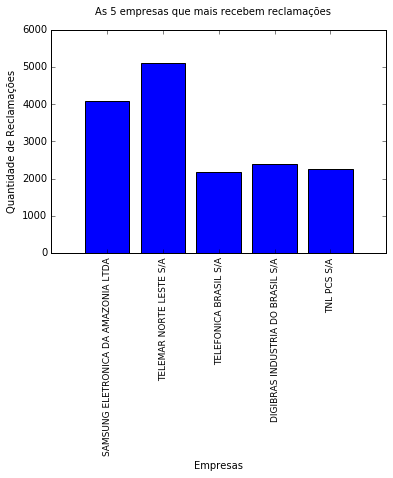

In [11]:
names = list(max_values_three.keys())
values = list(max_values_three.values())

plt.bar(range(len(max_values_three)), values, tick_label=names, align='center')
plt.xticks(fontsize=9, rotation='vertical')
plt.suptitle('As 5 empresas que mais recebem reclamações')
plt.xlabel('Empresas')
plt.ylabel('Quantidade de Reclamações')
plt.show()

Abaixo será representado as empresas com menos reclamações em 2014.

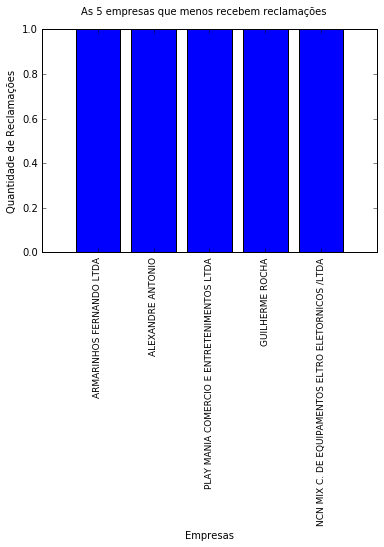

In [12]:
names = list(min_values_three.keys())
values = list(min_values_three.values())

plt.bar(range(len(min_values_three)), values, tick_label=names, align='center')
plt.xticks(fontsize=9, rotation='vertical')
plt.suptitle('As 5 empresas que menos recebem reclamações')
plt.xlabel('Empresas')
plt.ylabel('Quantidade de Reclamações')
plt.show()

## Quarto Dataset

O quarto dataset é uma análise das reclamações no procon no ano de 2015.

In [13]:
dataset_four = pd.read_csv('./dados/reclamacoes-fundamentadas-sindec-2015.csv', low_memory=False)
dataset_four_name = dataset_four['strRazaoSocial']

occurrences = {}
max_values_four = {}
min_values_four = {}

for item in dataset_four_name:
    if item not in occurrences:
        occurrences[item] = 1
    elif item in occurrences:
        occurrences[item] = occurrences[item] + 1

print('**** As 5 empresas com mais reclamações ****')

for line in heapq.nlargest(5, occurrences, occurrences.get):
    max_values_four[line] = occurrences[line]
for item in max_values_four:
    print(item, ' - ', max_values_four[item])

print('\n**** As 5 empresas com menos reclamações ****')

for line in heapq.nsmallest(5, occurrences, occurrences.get):
    min_values_four[line] = occurrences[line]
for item in min_values_four:
    print(item, ' - ', min_values_four[item])

**** As 5 empresas com mais reclamações ****
CLARO S/A  -  3357
TELEMAR NORTE LESTE S/A  -  4337
SKY BRASIL SERVIÇOS LTDA  -  2645
TIM CELULAR S/A  -  2657
CAIXA ECONOMICA FEDERAL  -  2683

**** As 5 empresas com menos reclamações ****
TOK FINAL  -  1
AMS & CIA MOVEIS LTDA - ME  -  1
SINUCA DE OURO COMÉRCIO VAREJISTA LTDA  -  1
BANCO SAFRA S.A.  -  1
OLIVEIRA TECNICA E COMERCIO LTDA - ME  -  1


### Gráfico - Empresas 2015

Abaixo será representado as empresas com mais reclamações em 2015.

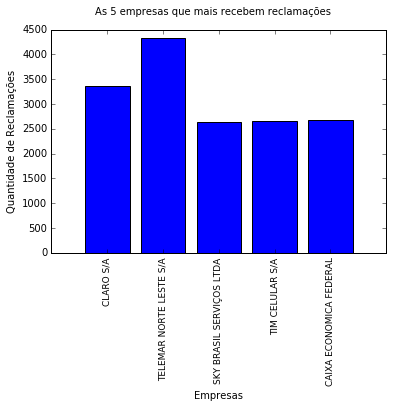

In [14]:
names = list(max_values_four.keys())
values = list(max_values_four.values())

plt.bar(range(len(max_values_four)), values, tick_label=names, align='center')
plt.xticks(fontsize=9, rotation='vertical')
plt.suptitle('As 5 empresas que mais recebem reclamações')
plt.xlabel('Empresas')
plt.ylabel('Quantidade de Reclamações')
plt.show()

Abaixo será representado as empresas com menos reclamações em 2015.

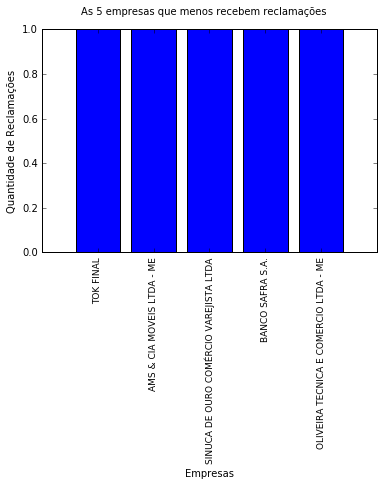

In [15]:
names = list(min_values_four.keys())
values = list(min_values_four.values())

plt.bar(range(len(min_values_four)), values, tick_label=names, align='center')
plt.xticks(fontsize=9, rotation='vertical')
plt.suptitle('As 5 empresas que menos recebem reclamações')
plt.xlabel('Empresas')
plt.ylabel('Quantidade de Reclamações')
plt.show()

## Quinto Dataset

O quinto dataset é uma análise das reclamações no procon do ano de 2016.

In [16]:
dataset_five = pd.read_csv('./dados/reclamacoes-fundamentadas-sindec-2016.csv')
dataset_five_name = dataset_five['strRazaoSocial']

occurrences = {}
max_values_five = {}
min_values_five = {}

for item in dataset_five_name:
    if item not in occurrences:
        occurrences[item] = 1
    elif item in occurrences:
        occurrences[item] = occurrences[item] + 1

print('**** As 5 empresas com mais reclamações ****')

for line in heapq.nlargest(5, occurrences, occurrences.get):
    max_values_five[line] = occurrences[line]
for item in max_values_five:
    print(item, ' - ', max_values_five[item])

print('\n**** As 5 empresas com menos reclamações ****')

for line in heapq.nsmallest(5, occurrences, occurrences.get):
    min_values_five[line] = occurrences[line]
for item in min_values_five:
    print(item, ' - ', min_values_five[item])
    print(line, ' - ', occurrences[line])

**** As 5 empresas com mais reclamações ****
CLARO S/A  -  2925
SAMSUNG ELETRONICA DA AMAZONIA LTDA  -  2203
CNOVA COMERCIO ELETRONICO S/A  -  2244
TELEMAR NORTE LESTE S/A  -  2979
CLARO S.A.  -  2024

**** As 5 empresas com menos reclamações ****
TOK FINAL  -  1
MIDWAY S.A CREDITO FINANCIMANTO E INVESTIMENTO  -  1
SP STUDIO FOTOGRÁFICO  -  1
MIDWAY S.A CREDITO FINANCIMANTO E INVESTIMENTO  -  1
MIDWAY S.A CREDITO FINANCIMANTO E INVESTIMENTO  -  1
MIDWAY S.A CREDITO FINANCIMANTO E INVESTIMENTO  -  1
DELTA INDUSTRIA CERAMICA S/A  -  1
MIDWAY S.A CREDITO FINANCIMANTO E INVESTIMENTO  -  1
ROMANO E SAN MARTINI LTDA  -  1
MIDWAY S.A CREDITO FINANCIMANTO E INVESTIMENTO  -  1


### Gráfico - Empresas 2016

Abaixo será representado as empresas com mais reclamações em 2016.

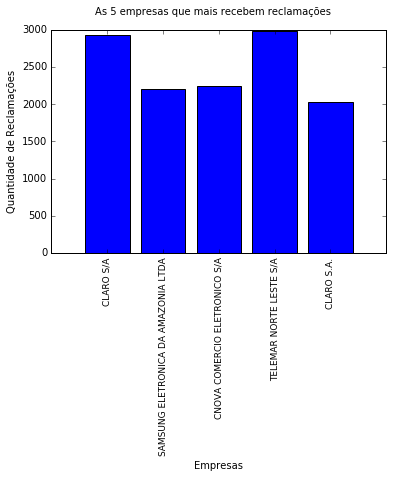

In [17]:
names = list(max_values_five.keys())
values = list(max_values_five.values())

plt.bar(range(len(max_values_five)), values, tick_label=names, align='center')
plt.xticks(fontsize=9, rotation='vertical')
plt.suptitle('As 5 empresas que mais recebem reclamações')
plt.xlabel('Empresas')
plt.ylabel('Quantidade de Reclamações')
plt.show()

Abaixo será representado as empresas com menos reclamações em 2016.

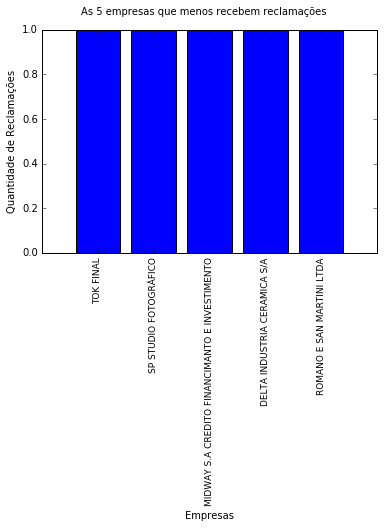

In [18]:
names = list(min_values_five.keys())
values = list(min_values_five.values())

plt.bar(range(len(min_values_five)), values, tick_label=names, align='center')
plt.xticks(fontsize=9, rotation='vertical')
plt.suptitle('As 5 empresas que menos recebem reclamações')
plt.xlabel('Empresas')
plt.ylabel('Quantidade de Reclamações')
plt.show()